In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import models
import data
import torchvision
from tqdm.notebook import tqdm

def tensor2imgs(t, n=8):
    imgrid = torchvision.utils.make_grid(t, n)
    return imgrid.data.mul(255).clamp(0, 255).byte().cpu().numpy()

latent_dim = 9
device = 'cuda'


def build_z_fixed():
    z_fixed_t = np.zeros([latent_dim, latent_dim + 1])

    for k in range(0, latent_dim):
        s = 0.0
        for i in range(0, k):
            s = s + z_fixed_t[i, k] ** 2

        z_fixed_t[k, k] = np.sqrt(1.0 - s)

        for j in range(k + 1, latent_dim + 1):
            s = 0.0
            for i in range(0, k):
                s = s + z_fixed_t[i, k] * z_fixed_t[i, j]

            z_fixed_t[k, j] = (-1.0 / float(latent_dim) - s) / z_fixed_t[k, k]
            z_fixed = np.transpose(z_fixed_t)
    return torch.tensor(z_fixed, device=device, dtype=torch.float)


model = models.INN_AA(latent_dim, conv=True, interpolation='linear', weight_norm_exp=1, weight_norm_constraint=1)
model.load_state_dict(dict(filter(lambda x: 'tmp' not in x[0], torch.load('runs/Jun28_16-14-27_GLaDOS_INN/checkpoints/innaa.pt').items())))
model = model.to(device)

model2 = models.INN_AA(latent_dim, conv=True, interpolation='linear', weight_norm_exp=2, weight_norm_constraint=0.9)
model2.load_state_dict(dict(filter(lambda x: 'tmp' not in x[0], torch.load('runs/Jun12_11-48-08_deep-thought_INN/checkpoints/innaa.pt').items())))
model2 = model2.to(device)

RuntimeError: Error(s) in loading state_dict for INN_AA:
	Missing key(s) in state_dict: "inn.module_list.2.s1.0.weight", "inn.module_list.2.s1.0.bias", "inn.module_list.2.s1.2.weight", "inn.module_list.2.s1.2.bias", "inn.module_list.2.s2.0.weight", "inn.module_list.2.s2.0.bias", "inn.module_list.2.s2.2.weight", "inn.module_list.2.s2.2.bias", "inn.module_list.4.s1.0.weight", "inn.module_list.4.s1.0.bias", "inn.module_list.4.s1.2.weight", "inn.module_list.4.s1.2.bias", "inn.module_list.4.s2.0.weight", "inn.module_list.4.s2.0.bias", "inn.module_list.4.s2.2.weight", "inn.module_list.4.s2.2.bias", "inn.module_list.7.s1.0.weight", "inn.module_list.7.s1.0.bias", "inn.module_list.7.s1.2.weight", "inn.module_list.7.s1.2.bias", "inn.module_list.7.s2.0.weight", "inn.module_list.7.s2.0.bias", "inn.module_list.7.s2.2.weight", "inn.module_list.7.s2.2.bias", "inn.module_list.9.s1.0.weight", "inn.module_list.9.s1.0.bias", "inn.module_list.9.s1.2.weight", "inn.module_list.9.s1.2.bias", "inn.module_list.9.s2.0.weight", "inn.module_list.9.s2.0.bias", "inn.module_list.9.s2.2.weight", "inn.module_list.9.s2.2.bias", "inn.module_list.11.s1.0.weight", "inn.module_list.11.s1.0.bias", "inn.module_list.11.s1.2.weight", "inn.module_list.11.s1.2.bias", "inn.module_list.11.s2.0.weight", "inn.module_list.11.s2.0.bias", "inn.module_list.11.s2.2.weight", "inn.module_list.11.s2.2.bias", "inn.module_list.13.s1.0.weight", "inn.module_list.13.s1.0.bias", "inn.module_list.13.s1.2.weight", "inn.module_list.13.s1.2.bias", "inn.module_list.13.s2.0.weight", "inn.module_list.13.s2.0.bias", "inn.module_list.13.s2.2.weight", "inn.module_list.13.s2.2.bias", "inn.module_list.17.s1.0.weight", "inn.module_list.17.s1.0.bias", "inn.module_list.17.s1.2.weight", "inn.module_list.17.s1.2.bias", "inn.module_list.17.s2.0.weight", "inn.module_list.17.s2.0.bias", "inn.module_list.17.s2.2.weight", "inn.module_list.17.s2.2.bias", "inn.module_list.19.s1.0.weight", "inn.module_list.19.s1.0.bias", "inn.module_list.19.s1.2.weight", "inn.module_list.19.s1.2.bias", "inn.module_list.19.s2.0.weight", "inn.module_list.19.s2.0.bias", "inn.module_list.19.s2.2.weight", "inn.module_list.19.s2.2.bias", "inn.module_list.21.s1.0.weight", "inn.module_list.21.s1.0.bias", "inn.module_list.21.s1.2.weight", "inn.module_list.21.s1.2.bias", "inn.module_list.21.s2.0.weight", "inn.module_list.21.s2.0.bias", "inn.module_list.21.s2.2.weight", "inn.module_list.21.s2.2.bias", "inn.module_list.23.s1.0.weight", "inn.module_list.23.s1.0.bias", "inn.module_list.23.s1.2.weight", "inn.module_list.23.s1.2.bias", "inn.module_list.23.s2.0.weight", "inn.module_list.23.s2.0.bias", "inn.module_list.23.s2.2.weight", "inn.module_list.23.s2.2.bias". 
	Unexpected key(s) in state_dict: "inn.mu", "inn.log_sig", "inn.net.module_list.2.s1.0.weight", "inn.net.module_list.2.s1.0.bias", "inn.net.module_list.2.s1.2.weight", "inn.net.module_list.2.s1.2.bias", "inn.net.module_list.2.s1.4.weight", "inn.net.module_list.2.s1.4.bias", "inn.net.module_list.2.s2.0.weight", "inn.net.module_list.2.s2.0.bias", "inn.net.module_list.2.s2.2.weight", "inn.net.module_list.2.s2.2.bias", "inn.net.module_list.2.s2.4.weight", "inn.net.module_list.2.s2.4.bias", "inn.net.module_list.4.s1.0.weight", "inn.net.module_list.4.s1.0.bias", "inn.net.module_list.4.s1.2.weight", "inn.net.module_list.4.s1.2.bias", "inn.net.module_list.4.s1.4.weight", "inn.net.module_list.4.s1.4.bias", "inn.net.module_list.4.s2.0.weight", "inn.net.module_list.4.s2.0.bias", "inn.net.module_list.4.s2.2.weight", "inn.net.module_list.4.s2.2.bias", "inn.net.module_list.4.s2.4.weight", "inn.net.module_list.4.s2.4.bias", "inn.net.module_list.6.s1.0.weight", "inn.net.module_list.6.s1.0.bias", "inn.net.module_list.6.s1.2.weight", "inn.net.module_list.6.s1.2.bias", "inn.net.module_list.6.s1.4.weight", "inn.net.module_list.6.s1.4.bias", "inn.net.module_list.6.s2.0.weight", "inn.net.module_list.6.s2.0.bias", "inn.net.module_list.6.s2.2.weight", "inn.net.module_list.6.s2.2.bias", "inn.net.module_list.6.s2.4.weight", "inn.net.module_list.6.s2.4.bias", "inn.net.module_list.8.s1.0.weight", "inn.net.module_list.8.s1.0.bias", "inn.net.module_list.8.s1.2.weight", "inn.net.module_list.8.s1.2.bias", "inn.net.module_list.8.s1.4.weight", "inn.net.module_list.8.s1.4.bias", "inn.net.module_list.8.s2.0.weight", "inn.net.module_list.8.s2.0.bias", "inn.net.module_list.8.s2.2.weight", "inn.net.module_list.8.s2.2.bias", "inn.net.module_list.8.s2.4.weight", "inn.net.module_list.8.s2.4.bias", "inn.net.module_list.11.s1.0.weight", "inn.net.module_list.11.s1.0.bias", "inn.net.module_list.11.s1.2.weight", "inn.net.module_list.11.s1.2.bias", "inn.net.module_list.11.s1.4.weight", "inn.net.module_list.11.s1.4.bias", "inn.net.module_list.11.s2.0.weight", "inn.net.module_list.11.s2.0.bias", "inn.net.module_list.11.s2.2.weight", "inn.net.module_list.11.s2.2.bias", "inn.net.module_list.11.s2.4.weight", "inn.net.module_list.11.s2.4.bias", "inn.net.module_list.13.s1.0.weight", "inn.net.module_list.13.s1.0.bias", "inn.net.module_list.13.s1.2.weight", "inn.net.module_list.13.s1.2.bias", "inn.net.module_list.13.s1.4.weight", "inn.net.module_list.13.s1.4.bias", "inn.net.module_list.13.s2.0.weight", "inn.net.module_list.13.s2.0.bias", "inn.net.module_list.13.s2.2.weight", "inn.net.module_list.13.s2.2.bias", "inn.net.module_list.13.s2.4.weight", "inn.net.module_list.13.s2.4.bias", "inn.net.module_list.15.s1.0.weight", "inn.net.module_list.15.s1.0.bias", "inn.net.module_list.15.s1.2.weight", "inn.net.module_list.15.s1.2.bias", "inn.net.module_list.15.s1.4.weight", "inn.net.module_list.15.s1.4.bias", "inn.net.module_list.15.s2.0.weight", "inn.net.module_list.15.s2.0.bias", "inn.net.module_list.15.s2.2.weight", "inn.net.module_list.15.s2.2.bias", "inn.net.module_list.15.s2.4.weight", "inn.net.module_list.15.s2.4.bias", "inn.net.module_list.17.s1.0.weight", "inn.net.module_list.17.s1.0.bias", "inn.net.module_list.17.s1.2.weight", "inn.net.module_list.17.s1.2.bias", "inn.net.module_list.17.s1.4.weight", "inn.net.module_list.17.s1.4.bias", "inn.net.module_list.17.s2.0.weight", "inn.net.module_list.17.s2.0.bias", "inn.net.module_list.17.s2.2.weight", "inn.net.module_list.17.s2.2.bias", "inn.net.module_list.17.s2.4.weight", "inn.net.module_list.17.s2.4.bias", "inn.net.module_list.20.s1.0.weight", "inn.net.module_list.20.s1.0.bias", "inn.net.module_list.20.s1.2.weight", "inn.net.module_list.20.s1.2.bias", "inn.net.module_list.20.s1.4.weight", "inn.net.module_list.20.s1.4.bias", "inn.net.module_list.20.s2.0.weight", "inn.net.module_list.20.s2.0.bias", "inn.net.module_list.20.s2.2.weight", "inn.net.module_list.20.s2.2.bias", "inn.net.module_list.20.s2.4.weight", "inn.net.module_list.20.s2.4.bias", "inn.net.module_list.22.s1.0.weight", "inn.net.module_list.22.s1.0.bias", "inn.net.module_list.22.s1.2.weight", "inn.net.module_list.22.s1.2.bias", "inn.net.module_list.22.s1.4.weight", "inn.net.module_list.22.s1.4.bias", "inn.net.module_list.22.s2.0.weight", "inn.net.module_list.22.s2.0.bias", "inn.net.module_list.22.s2.2.weight", "inn.net.module_list.22.s2.2.bias", "inn.net.module_list.22.s2.4.weight", "inn.net.module_list.22.s2.4.bias". 
	size mismatch for layers_A.0.weight: copying a param with shape torch.Size([10, 784]) from checkpoint, the shape in current model is torch.Size([10, 1024]).
	size mismatch for layers_B.0.weight: copying a param with shape torch.Size([10, 784]) from checkpoint, the shape in current model is torch.Size([10, 1024]).
	size mismatch for layers_C.0.weight: copying a param with shape torch.Size([784, 9]) from checkpoint, the shape in current model is torch.Size([1024, 9]).
	size mismatch for layers_C.0.bias: copying a param with shape torch.Size([784]) from checkpoint, the shape in current model is torch.Size([1024]).

In [ ]:
x, y = next(iter(data.train_loader))

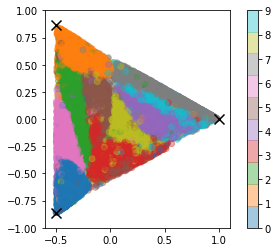

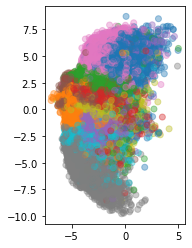

In [3]:
# %matplotlib inline
with torch.no_grad():
    z_fixed = build_z_fixed()
    latent_codes = torch.empty(0, latent_dim)
    inn_codes = torch.empty(0, 28*28)
    labels = torch.empty(0, dtype=torch.long)
    for samples, targets in tqdm(data.train_loader, leave=False):
        samples = samples.to(device)
        t, A, B = model(samples)
#         A_ = torch.sin(A *np.pi *2/3)
#         latent_codes = torch.cat([latent_codes, (A_ @ z_fixed / np.sin(np.pi * 2/3)).cpu()], dim=0)
        latent_codes = torch.cat([latent_codes, (A @ z_fixed).cpu()], dim=0)
        inn_codes = torch.cat([inn_codes, t.cpu()], dim=0)
        labels = torch.cat([labels, targets], dim=0)

    fig, ax = plt.subplots()
    img = ax.scatter(latent_codes[:, 0], latent_codes[:, 1], alpha=0.4,
               c=labels, cmap='tab10', vmin=0, vmax=9)
    ax.set_aspect('equal')
     # @ v
    ax.scatter(z_fixed[:, 0].cpu(), z_fixed[:, 1].cpu(), marker='x', s=100, c='k')
    ax.set_aspect('equal')
    fig.colorbar(img)
    plt.show(fig)
    
    _, _, v = torch.svd(inn_codes)
    inn_codes = inn_codes @ v

    fig, ax = plt.subplots()
    ax.scatter(inn_codes[:, 0], inn_codes[:, 1], alpha=0.4,
               c=labels, cmap='tab10', vmin=0, vmax=9)
    ax.set_aspect('equal')
    plt.show(fig)

torch.Size([10, 9])
tensor([9], device='cuda:0')
tensor([8], device='cuda:0')
tensor([6], device='cuda:0')
tensor([1], device='cuda:0')
tensor([7], device='cuda:0')
tensor([9], device='cuda:0')
tensor([2], device='cuda:0')
tensor([4], device='cuda:0')
tensor([6], device='cuda:0')
tensor([1], device='cuda:0')
tensor([9], device='cuda:0')
tensor([0], device='cuda:0')
tensor([9], device='cuda:0')
tensor([9], device='cuda:0')
tensor([7], device='cuda:0')
tensor([3], device='cuda:0')
tensor([6], device='cuda:0')
tensor([1], device='cuda:0')
tensor([8], device='cuda:0')
tensor([0], device='cuda:0')
tensor([6, 6, 5, 3, 6, 5, 6, 8, 8, 1, 4, 2, 2, 4, 8, 3, 2, 8, 8, 6])


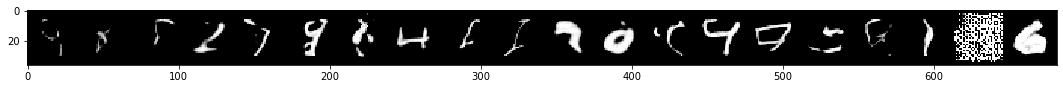

In [15]:
z_fixed = build_z_fixed()
print(z_fixed.shape)
samples = torch.empty(0, 1, 32, 32)
labels = torch.empty(0)
def make_cond(labels):
    cond_tensor = torch.zeros(labels.size(0), 10).cuda()
    cond_tensor.scatter_(1, labels.view(-1, 1), 1.)
    return cond_tensor

for t in np.linspace(0, 1, 20):
    a = torch.exp(torch.randn(1, 10, device=device))
    a /= torch.sum(a**2)**(1/2)
    a *= 0.5
#     print(a.shape)

    fill = torch.zeros((10, 10, 32, 32), device=device)
    for i in range(10):
        fill[i, i, :, :] = 1

    targets = torch.randint(10, (1,), device=device)
    print(targets)
    cond = [
        fill[:, :, :16, :16][targets],
        fill[:, :, :8, :8][targets],
        make_cond(targets)
    ]
#     print(cond.shape)
    x_hat, labels_ = model.sample(a, z_fixed, cond)
    samples = torch.cat([samples, x_hat.cpu()], dim=0)
    labels = torch.cat([labels, labels_.cpu()], dim=0)
    
plt.figure(figsize=(20,1))
plt.imshow(tensor2imgs(samples, 20).transpose(1, 2, 0))
print(labels.max(dim=1)[1])

torch.Size([512, 10])
torch.Size([1, 784])


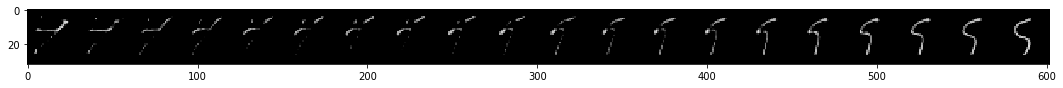

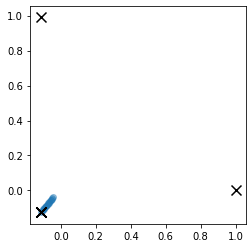

In [19]:
latents, A, _ = model(x.to(device))
print(A.shape)
print(latents[1:2].shape)
z_fixed = build_z_fixed()

samples = torch.empty(0, 1, 28, 28)
latent_codes = torch.empty(0, latent_dim)
for t in np.linspace(0, 1, 20):
    x_hat, _ = model.sample((t*A[0:1, :] + (1-t)*A[1:2, :]), z_fixed)
    samples = torch.cat([samples, x_hat.cpu()], dim=0)
#     A_ = torch.sin((t*A[:1, :] + (1-t)*A[2:3, :]) *np.pi *2/3)
    latent_codes = torch.cat([latent_codes, ((t*A[0:1, :] + (1-t)*A[1:2, :]) @ z_fixed).detach().cpu()], dim=0)
    
plt.figure(figsize=(20,1))
plt.imshow(tensor2imgs(samples, 20).transpose(1, 2, 0))

fig, ax = plt.subplots()
img = ax.scatter(latent_codes[:, 0], latent_codes[:, 1], alpha=0.4, cmap='tab10', vmin=0, vmax=9)
ax.set_aspect('equal')
 # @ v
ax.scatter(z_fixed[:, 0].cpu(), z_fixed[:, 1].cpu(), marker='x', s=100, c='k')
ax.set_aspect('equal')
# fig.colorbar(img)
plt.show(fig)

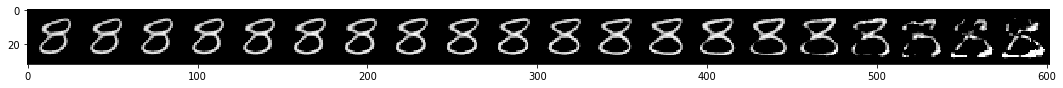

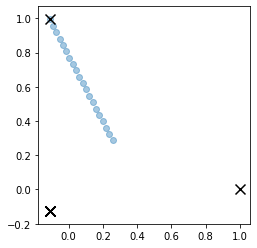

In [10]:
z_fixed = build_z_fixed()

A = torch.tensor([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0.33, 0.33, 0, 0, 0, 0.33, 0, 0, 0, 0]], device=device, dtype=torch.float)

samples = torch.empty(0, 1, 32, 32)
latent_codes = torch.empty(0, latent_dim)
for t in np.linspace(0, 1, 20):
    x_hat, _ = model.sample((t*A[:1, :] + (1-t)*A[1:, :]), z_fixed)
    samples = torch.cat([samples, x_hat.cpu()], dim=0)
    A_ = (t*A[:1, :] + (1-t)*A[1:, :])
    latent_codes = torch.cat([latent_codes, (A_ @ z_fixed).detach().cpu()], dim=0)
    
plt.figure(figsize=(20,1))
plt.imshow(tensor2imgs(samples, 20).transpose(1, 2, 0))

fig, ax = plt.subplots()
img = ax.scatter(latent_codes[:, 0], latent_codes[:, 1], alpha=0.4, cmap='tab10', vmin=0, vmax=9)
ax.set_aspect('equal')
 # @ v
ax.scatter(z_fixed[:, 0].cpu(), z_fixed[:, 1].cpu(), marker='x', s=100, c='k')
ax.set_aspect('equal')
# fig.colorbar(img)
plt.show(fig)